# Importar bibliotecas

In [1]:
#!pip install -U deep-translator

In [2]:
!pip install sumy

     ---------------------------------------- 0.0/97.3 kB ? eta -:--:--
     ---------------------------------------- 97.3/97.3 kB 5.4 MB/s eta 0:00:00
  Using cached docopt-0.6.2.tar.gz (25 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/10.1 MB ? eta -:--:--
     - -------------------------------------- 0.3/10.1 MB 20.5 MB/s eta 0:00:01
     -- ------------------------------------- 0.6/10.1 MB 8.1 MB/s eta 0:00:02
     ---- ----------------------------------- 1.1/10.1 MB 8.4 MB/s eta 0:00:02
     ------ --------------------------------- 1.6/10.1 MB 9.0 MB/s eta 0:00:01
     ------- -------------------------------- 1.9/10.1 MB 8.8 MB/s eta 0:00:01
     --------- ------------------------------ 2.4/10.1 MB 9.2 MB/s eta 0:00:01
     ----------- ---------------------------- 2.9/10.1


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from numba import jit, prange, njit
import time
# from deep_translator import GoogleTranslator, single_detection

from sumy.nlp.tokenizers import Tokenizer
from sumy.parsers.plaintext import PlaintextParser
from sumy.summarizers.lsa import LsaSummarizer


# download de stopwords de nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

ModuleNotFoundError: No module named 'wordcloud'

# Pré Processamento
Antes de analisar os sentimentos de cada restaurante, devemos filtrar e limpar os datasets que iremos usar

In [ ]:
#Limpeza de dados
df = pd.read_csv('most_relevant_reviews.csv',sep = ',', usecols=['title', 'place_id', 'username', 'rating', 'description', 'date'])
df

,title,place_id,username,rating,description,date
0,Por um Punhado de Dólares,ChIJ08g_akxYzpQR0RO2V9l10wA,Vanessa Scott,5,"Very chill and hipster, cool place! Came here ...",a month ago
1,Por um Punhado de Dólares,ChIJ08g_akxYzpQR0RO2V9l10wA,Pedro Henrique Fernandes,5,"Superb coffee shop in São Paulo, easily one of...",3 months ago
2,Por um Punhado de Dólares,ChIJ08g_akxYzpQR0RO2V9l10wA,Caio Cruz,5,Really cool atmosphere plus good cakes and cof...,9 months ago
3,Por um Punhado de Dólares,ChIJ08g_akxYzpQR0RO2V9l10wA,Sebastian HH,5,Super nice cafe !\nDelicious coffee and sandwi...,a month ago
4,Por um Punhado de Dólares,ChIJ08g_akxYzpQR0RO2V9l10wA,Rachel B,5,Super enjoyed this place! We came in passing w...,4 years ago
...,...,...,...,...,...,...
4331,Villares Lounge Club,ChIJV1wC_1j3zpQRCrOgpy20cOI,André Marques,5,NaN,a month ago
4332,Villares Lounge Club,ChIJV1wC_1j3zpQRCrOgpy20cOI,Richard Lucas,4,NaN,7 months ago
4333,Villares Lounge Club,ChIJV1wC_1j3zpQRCrOgpy20cOI,Iago Vilas Boas,4,NaN,2 months ago
4334,Villares Lounge Club,ChIJV1wC_1j3zpQRCrOgpy20cOI,Denis Balduino,5,NaN,3 weeks ago


In [ ]:
#Organizar o dataset 
df = df.rename(columns={"title":"restaurante"})
df = df.rename(columns={"description":"comentario"})
df = df.dropna().reset_index(drop=True)
df

,restaurante,place_id,username,rating,comentario,date
0,Por um Punhado de Dólares,ChIJ08g_akxYzpQR0RO2V9l10wA,Vanessa Scott,5,"Very chill and hipster, cool place! Came here ...",a month ago
1,Por um Punhado de Dólares,ChIJ08g_akxYzpQR0RO2V9l10wA,Pedro Henrique Fernandes,5,"Superb coffee shop in São Paulo, easily one of...",3 months ago
2,Por um Punhado de Dólares,ChIJ08g_akxYzpQR0RO2V9l10wA,Caio Cruz,5,Really cool atmosphere plus good cakes and cof...,9 months ago
3,Por um Punhado de Dólares,ChIJ08g_akxYzpQR0RO2V9l10wA,Sebastian HH,5,Super nice cafe !\nDelicious coffee and sandwi...,a month ago
4,Por um Punhado de Dólares,ChIJ08g_akxYzpQR0RO2V9l10wA,Rachel B,5,Super enjoyed this place! We came in passing w...,4 years ago
...,...,...,...,...,...,...
4224,Pastel da Rose,ChIJsUvtjMRZzpQRIV9yNjTkbUE,Balatonfüredi Dávid,5,Best pastel in town! O maior é mais recheado!...,3 months ago
4225,Pastel da Rose,ChIJsUvtjMRZzpQRIV9yNjTkbUE,João Carlos Sousa,5,"Simpática e prestativa, Rose faz pastéis na ho...",7 months ago
4226,Pastel da Rose,ChIJsUvtjMRZzpQRIV9yNjTkbUE,Isabela Pontes,5,"Meu deus, o pastel é sensaaacional se bom. Mas...",9 months ago
4227,Pastel da Rose,ChIJsUvtjMRZzpQRIV9yNjTkbUE,Henrique Costa (Silva),5,Sem duvidas o melhor pastel da cidade!! Além d...,a year ago


In [ ]:
# traduzindo dados para inglês, usando computacão paralela
@jit(parallel=True)
def traduzir_comentarios(comentarios):
  translated_list = []
  my_translator = GoogleTranslator(source='auto', target='english')

  for c in prange(len(comentarios)):
    result = my_translator.translate(text=str(comentarios[c]))
    translated_list.append(result)  
  return translated_list

In [ ]:
tempo_inicial = time.time()
df['comentario'] = traduzir_comentarios(df.comentario.values)
tempo_final = time.time()
print(f"A duração da tradução foi de {tempo_final - tempo_inicial} segundos")

<ipython-input-4-7ae2b850e5d8>:2: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "traduzir_comentarios" failed type inference due to: Untyped global name 'GoogleTranslator': Cannot determine Numba type of <class 'abc.ABCMeta'>

File "<ipython-input-4-7ae2b850e5d8>", line 5:
def traduzir_comentarios(comentarios):
    <source elided>
  translated_list = []
  my_translator = GoogleTranslator(source='auto', target='english')
  ^

  @jit(parallel=True)
<ipython-input-4-7ae2b850e5d8>:2: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "traduzir_comentarios" failed type inference due to: Untyped global name 'GoogleTranslator': Cannot determine Numba type of <class 'abc.ABCMeta'>

File "<ipython-input-4-7ae2b850e5d8>", line 5:
def traduzir_comentarios(comentarios):
    <source elided>
  translated_list = []
  my_translator = GoogleTranslator(source='auto', target='english')
  ^

  @jit(pa

A duração da tradução foi de 719.6106474399567 segundos


In [ ]:
#salvando no csv
df.to_csv('most_relevant_reviews_translated.csv', index=False)

# Remover os stopwords

In [ ]:
df = pd.read_csv('most_relevant_reviews_translated.csv',sep=',')
df

,restaurante,place_id,username,rating,comentario,date
0,Por um Punhado de Dólares,ChIJ08g_akxYzpQR0RO2V9l10wA,Vanessa Scott,5,"Very chill and hipster, cool place! Came here ...",a month ago
1,Por um Punhado de Dólares,ChIJ08g_akxYzpQR0RO2V9l10wA,Pedro Henrique Fernandes,5,"Superb coffee shop in São Paulo, easily one of...",3 months ago
2,Por um Punhado de Dólares,ChIJ08g_akxYzpQR0RO2V9l10wA,Caio Cruz,5,Really cool atmosphere plus good cakes and cof...,9 months ago
3,Por um Punhado de Dólares,ChIJ08g_akxYzpQR0RO2V9l10wA,Sebastian HH,5,Super nice cafe !\nDelicious coffee and sandwi...,a month ago
4,Por um Punhado de Dólares,ChIJ08g_akxYzpQR0RO2V9l10wA,Rachel B,5,Super enjoyed this place! We came in passing w...,4 years ago
...,...,...,...,...,...,...
4224,Pastel da Rose,ChIJsUvtjMRZzpQRIV9yNjTkbUE,Balatonfüredi Dávid,5,Best pastel in town! The bigger one is more st...,3 months ago
4225,Pastel da Rose,ChIJsUvtjMRZzpQRIV9yNjTkbUE,João Carlos Sousa,5,"Friendly and helpful, Rose makes pastries on t...",7 months ago
4226,Pastel da Rose,ChIJsUvtjMRZzpQRIV9yNjTkbUE,Isabela Pontes,5,"My god, the pastel is sensational if good. Dry...",9 months ago
4227,Pastel da Rose,ChIJsUvtjMRZzpQRIV9yNjTkbUE,Henrique Costa (Silva),5,Without a doubt the best pastel in town!! In a...,a year ago


In [ ]:
# Criando DataFrames vazios para armazenar pontuações de polaridade de sentimento e frequencias de palavras
sentimento_df = pd.DataFrame(columns=['restaurante', 'comentario', 'polaridade'])
freq_df = pd.DataFrame(columns=['restaurante', 'palavra', 'frequencia'])

In [ ]:
# Para cada avaliação de restaurante, análisamos a polaridade de sentimentos e a estatísticas de frequência de palavras
for restaurante in df['restaurante'].unique():
    reviews = df.loc[df['restaurante'] == restaurante, 'comentario']
    
    words = []
    # analise de sentimento
    for comentario in reviews:
        # Tokenização de texto e exclusão de stopword
        review_str = str(comentario)
        tokens = nltk.word_tokenize(review_str.lower())

        # calculando polaridade
        blob = TextBlob(' '.join(tokens))
        polaridade = blob.sentiment.polarity
        
        # Adicionando pontuações de polaridade de sentimento no DataFrame "sentimento_df"
        sentimento_df = sentimento_df.append({
            'restaurante': restaurante,
            'comentario': comentario,
            'polaridade': polaridade
        }, ignore_index=True)

        #estrutura de repetição para exclusão de stopwords em portugues e ingles
        linguagens = ['english', 'portuguese']
        tokens_freq = tokens.copy()
        for l in linguagens:
            tokens_freq = [t for t in tokens_freq if t.isalpha() and t not in stopwords.words(l)]
        
        words += tokens_freq
    
    freq_dist = nltk.FreqDist(words)
    
    # Adicionando pontuações de polaridade de sentimento no DataFrame "freq_df"
    for palavra, frequencia in freq_dist.items():
        freq_df = freq_df.append({
            'restaurante': restaurante,
            'palavra': palavra,
            'frequencia': frequencia
        }, ignore_index=True)

A saída de streaming foi truncada nas últimas 5000 linhas.
<ipython-input-9-549617062d0b>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  freq_df = freq_df.append({
<ipython-input-9-549617062d0b>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  freq_df = freq_df.append({
<ipython-input-9-549617062d0b>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  freq_df = freq_df.append({
<ipython-input-9-549617062d0b>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  freq_df = freq_df.append({
<ipython-input-9-549617062d0b>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.c

In [ ]:
sentimento_df['rating']=df['rating']
sentimento_df['place_id']=df['place_id']
sentimento_df

,restaurante,comentario,polaridade,rating,place_id
0,Por um Punhado de Dólares,"Very chill and hipster, cool place! Came here ...",0.510648,5,ChIJ08g_akxYzpQR0RO2V9l10wA
1,Por um Punhado de Dólares,"Superb coffee shop in São Paulo, easily one of...",0.257292,5,ChIJ08g_akxYzpQR0RO2V9l10wA
2,Por um Punhado de Dólares,Really cool atmosphere plus good cakes and cof...,0.258333,5,ChIJ08g_akxYzpQR0RO2V9l10wA
3,Por um Punhado de Dólares,Super nice cafe !\nDelicious coffee and sandwi...,0.694444,5,ChIJ08g_akxYzpQR0RO2V9l10wA
4,Por um Punhado de Dólares,Super enjoyed this place! We came in passing w...,0.530889,5,ChIJ08g_akxYzpQR0RO2V9l10wA
...,...,...,...,...,...
4224,Pastel da Rose,Best pastel in town! The bigger one is more st...,0.562500,5,ChIJsUvtjMRZzpQRIV9yNjTkbUE
4225,Pastel da Rose,"Friendly and helpful, Rose makes pastries on t...",0.458273,5,ChIJsUvtjMRZzpQRIV9yNjTkbUE
4226,Pastel da Rose,"My god, the pastel is sensational if good. Dry...",0.469444,5,ChIJsUvtjMRZzpQRIV9yNjTkbUE
4227,Pastel da Rose,Without a doubt the best pastel in town!! In a...,0.603704,5,ChIJsUvtjMRZzpQRIV9yNjTkbUE


In [ ]:
#Criar a função para idetificar se a polaridade é positivo, neutro ou negativo
def polaridade(nota):
    if nota > 0:
        return (1, 'Positivo')
    elif nota < 0:
        return (-1, 'Negativo')
    else:
        return (0, 'Neutro')
    
# Adicionar tanto a polaridade em número quanto em texto em uma nova coluna
sentimento_df[['polaridade_num', 'polaridade_texto']] = sentimento_df['polaridade'].apply(polaridade).apply(pd.Series)
sentimento_df

,restaurante,comentario,polaridade,rating,place_id,polaridade_num,polaridade_texto
0,Por um Punhado de Dólares,"Very chill and hipster, cool place! Came here ...",0.510648,5,ChIJ08g_akxYzpQR0RO2V9l10wA,1,Positivo
1,Por um Punhado de Dólares,"Superb coffee shop in São Paulo, easily one of...",0.257292,5,ChIJ08g_akxYzpQR0RO2V9l10wA,1,Positivo
2,Por um Punhado de Dólares,Really cool atmosphere plus good cakes and cof...,0.258333,5,ChIJ08g_akxYzpQR0RO2V9l10wA,1,Positivo
3,Por um Punhado de Dólares,Super nice cafe !\nDelicious coffee and sandwi...,0.694444,5,ChIJ08g_akxYzpQR0RO2V9l10wA,1,Positivo
4,Por um Punhado de Dólares,Super enjoyed this place! We came in passing w...,0.530889,5,ChIJ08g_akxYzpQR0RO2V9l10wA,1,Positivo
...,...,...,...,...,...,...,...
4224,Pastel da Rose,Best pastel in town! The bigger one is more st...,0.562500,5,ChIJsUvtjMRZzpQRIV9yNjTkbUE,1,Positivo
4225,Pastel da Rose,"Friendly and helpful, Rose makes pastries on t...",0.458273,5,ChIJsUvtjMRZzpQRIV9yNjTkbUE,1,Positivo
4226,Pastel da Rose,"My god, the pastel is sensational if good. Dry...",0.469444,5,ChIJsUvtjMRZzpQRIV9yNjTkbUE,1,Positivo
4227,Pastel da Rose,Without a doubt the best pastel in town!! In a...,0.603704,5,ChIJsUvtjMRZzpQRIV9yNjTkbUE,1,Positivo


In [ ]:
# Salvando pontuações de polaridade de sentimento e frequências de palavras para um arquivo CSV
sentimento_df.to_csv('restaurant_polaridade.csv', index=False)
freq_df.to_csv('restaurant_word_freq.csv', index=False)

# Análise de sentimento

In [ ]:
sent_restaurante = sentimento_df.copy()
sent_restaurante.head()

,restaurante,comentario,polaridade,rating,place_id,polaridade_num,polaridade_texto
0,Por um Punhado de Dólares,"Very chill and hipster, cool place! Came here ...",0.510648,5,ChIJ08g_akxYzpQR0RO2V9l10wA,1,Positivo
1,Por um Punhado de Dólares,"Superb coffee shop in São Paulo, easily one of...",0.257292,5,ChIJ08g_akxYzpQR0RO2V9l10wA,1,Positivo
2,Por um Punhado de Dólares,Really cool atmosphere plus good cakes and cof...,0.258333,5,ChIJ08g_akxYzpQR0RO2V9l10wA,1,Positivo
3,Por um Punhado de Dólares,Super nice cafe !\nDelicious coffee and sandwi...,0.694444,5,ChIJ08g_akxYzpQR0RO2V9l10wA,1,Positivo
4,Por um Punhado de Dólares,Super enjoyed this place! We came in passing w...,0.530889,5,ChIJ08g_akxYzpQR0RO2V9l10wA,1,Positivo


In [ ]:
#melhores restaurantes por meio de analise de sentimento 
top_ratings = sent_restaurante.sort_values(['polaridade','rating'], ascending=False)
top_ratings[:]

,restaurante,comentario,polaridade,rating,place_id,polaridade_num,polaridade_texto
62,Café Sol,Went there for coffee and a dessert. Everythin...,1.0,5,ChIJKY73HalZzpQR1ZE9JE8dzS0,1,Positivo
68,Um Coffee Co.,Awesome!!,1.0,5,ChIJgY-iHWZYzpQRUQ1dHiOh1IU,1,Positivo
79,Um Coffee Co.,Great service and coffee!,1.0,5,ChIJy_Nx8yVazpQRfS3c9meKjik,1,Positivo
155,Starbucks,Great service! And a delicious brigadeiro frap...,1.0,5,ChIJYdxZ6Z1XzpQRF6a4w5mWwzg,1,Positivo
177,the little coffee shop . CAFÉ ESPECIAL & CURSO...,"One of the best in São Paulo, no doubt. Great ...",1.0,5,ChIJLZAxhsdZzpQRqTokkP9PAKg,1,Positivo
...,...,...,...,...,...,...,...
3612,Bolo da Madre,"I had a terrible experience, my order was canc...",-1.0,5,ChIJMxUQOZtbzpQRMFfnopTnW0M,-1,Negativo
3932,Fábrica de Bolo Vó Alzira Bangu,"I bought a passion fruit cake, through Ifood, ...",-1.0,5,ChIJm2OcUOtYzpQRvQ0lNNaEdYQ,-1,Negativo
151,Starbucks,Terrible service.\nHad an argument with one of...,-1.0,4,ChIJgX_VHYNXzpQRBVLomhGDEjk,-1,Negativo
2577,Confeitaria e Panificadora Doce Belo,Just horrible this owner treats others as if t...,-1.0,4,ChIJecU9gcDNyJQRdLbIg_1Jeus,-1,Negativo


In [ ]:
#Se estivermos preocupados com as avaliações totais de sentimento de diferentes restaurantes, podemos primeiro olhar para a média dessas avaliações do restaurante, aqui usamos o método pivot_table:
mean_ratings = sent_restaurante.pivot_table(values=['polaridade','rating'], index='restaurante',aggfunc='mean')
mean_ratings[:5]

,polaridade,rating
restaurante,,
'Liderança MaxCoffee Quality | Locação E Venda De Máquinas De Café Expresso Profissional - Vending - Café TerraGrão - Eventos,0.588156,4.375
89ºC Coffee Station,0.409069,4.000
@ Zona Norte,0.918333,3.500
A Baianeira,0.493646,4.625
A Bolaria,0.769018,5.000


In [ ]:
#Vendo  estatísticas de cada restaurante e o número de votantes:
ratings_by_place = sent_restaurante.groupby('restaurante').size()
ratings_by_place[:10]

restaurante
'Liderança MaxCoffee Quality | Locação E Venda De Máquinas De Café Expresso Profissional - Vending - Café TerraGrão - Eventos    8
89ºC Coffee Station                                                                                                              8
@ Zona Norte                                                                                                                     2
A Baianeira                                                                                                                      8
A Bolaria                                                                                                                        7
A Casa do Porco Bar                                                                                                              8
A Creperia                                                                                                                       8
A Douceur Doces Finos                                                  

In [ ]:
#Se o número de votantes for muito baixo, então esses dados não são objetivos, vamos selecionar restaurantes com mais de 4 votantes:
active_place = ratings_by_place.index[ratings_by_place >= 5]
active_place

Index([''Liderança MaxCoffee Quality | Locação E Venda De Máquinas De Café Expresso Profissional - Vending - Café TerraGrão - Eventos',
       '89ºC Coffee Station', 'A Baianeira', 'A Bolaria',
       'A Casa do Porco Bar', 'A Creperia',
       'A Imperatriz • Casa de Chá - Presentes - Terapias',
       'A Quinta do Marquês- Xodó Paulista',
       'A Refinaria Gourmet Unidade Vila Leopoldina',
       'ALTO DA MOOCA PÃES E DOCES',
       ...
       'YERBA + Por um Punhado de Dólares', 'ZUD Café', 'Zeu's Hot Dog',
       'Ziriguidum Bar', 'boteco Tamandaré', 'café paris', 'café zinn',
       'padaria', 'quilinho',
       'the little coffee shop . CAFÉ ESPECIAL & CURSOS . Delivery/retiradas agendadas, e workshop online p/ quem quer empreender.'],
      dtype='object', name='restaurante', length=492)

In [ ]:
#media de ratings
mean_ratings = mean_ratings.loc[active_place]
mean_ratings

,polaridade,rating
restaurante,,
'Liderança MaxCoffee Quality | Locação E Venda De Máquinas De Café Expresso Profissional - Vending - Café TerraGrão - Eventos,0.588156,4.375
89ºC Coffee Station,0.409069,4.000
A Baianeira,0.493646,4.625
A Bolaria,0.769018,5.000
A Casa do Porco Bar,0.508805,4.750
...,...,...
café paris,0.427439,4.625
café zinn,0.362548,4.125
padaria,0.440074,4.000


In [ ]:
#ordenando os 10 primeiros restaurantes por meio de rating
top_ratings = mean_ratings.sort_values(by='rating', ascending=False)
top_ratings[:10]

,polaridade,rating
restaurante,,
Pastel da Rose,0.508400,5.0
Spoleto,-0.061226,5.0
Nó 8 Café,0.401394,5.0
Brothaus Breads & Pastries,0.373607,5.0
Oggi Sorvetes,0.662490,5.0
Oggi Sorvetes - Vila Guarani,0.541944,5.0
Padaria Bella Paulista,0.325796,5.0
Padaria Brasileira,0.338835,5.0
Bar do Nico,0.489397,5.0


In [ ]:
#ordenando os 10 primeiros restaurantes por meio de média de polaridade
top_ratings = mean_ratings.sort_values(by='polaridade', ascending=False)
top_ratings[:10]

,polaridade,rating
restaurante,,
A Bolaria,0.769018,5.000
Cafeteria São Paulo,0.742917,4.250
Tetê Confectionery Gelateria Cafe,0.724749,4.000
Farsoun Comida e Doces Árabe Sirio,0.718557,4.875
Actual - Máquinas De Café em São Paulo - Venda e Locação Máquinas de Café,0.703125,5.000
Abarista Cafés,0.693690,4.000
Do Digo Macarons e Chocolates,0.685147,4.250
The Francis Bolos e Doces,0.680933,4.625
Nakajyma Sushi Limão,0.679310,4.250


# CONCLUSÃO DE ANALISE DE SENTIMENTO
O cálculo de polaridade e rating é diferente devido a polaridade foi calculada com base nas avaliações dos clientes e o rating foi baseado em critérios como qualidade da comida, serviço e ambiente, mostrado na output de frequencia de palavras. Assim, é possível que a polaridade e o rating sejam opostos.
Então, a relação entre a polaridade e o rating pode variar de acordo com o contexto e as métricas específicas usadas para calcular cada um. Por isso, é difícil analisar por aqui, portanto, será mostrado mais explicativo no analise de frequencia de palavras.

# Analise de frequencias das palavras

In [ ]:
top_ratings = freq_df.sort_values(['frequencia'], ascending=False)
top_ratings[:10]

,restaurante,palavra,frequencia
4928,The Coffee,coffee,99
4959,The Coffee,service,33
4961,The Coffee,place,24
4933,The Coffee,good,24
44304,Casa de Bolos - Teodoro Sampaio 636 (PRÓXIMO A...,cake,20
15860,Le Pain Quotidien,good,20
10829,Saint Decor Bistrô,place,20
4934,The Coffee,quality,19
674,Coffee Lab,coffee,19
5017,The Coffee,great,18


Digite o restaurante desejado: The Coffee


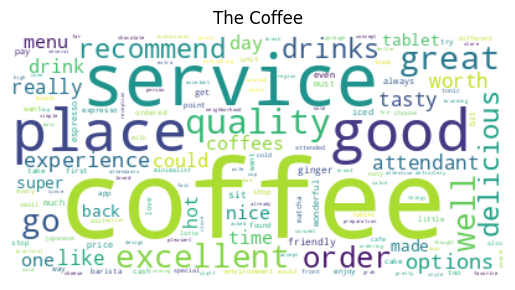

In [ ]:
# Definir o nome do restaurante que você deseja analisar
restaurante = input(str('Digite o restaurante desejado: ')) #Nesse caso, peguei o restaurante com melhor polaridade

# Filtrar o DataFrame para selecionar apenas os dados do restaurante desejado
restaurante_df = freq_df[freq_df["restaurante"] == restaurante]

# Criar um dicionário com as palavras e suas frequências
palavras = dict(zip(restaurante_df["palavra"], restaurante_df["frequencia"]))

# Criar a nuvem de palavras
wordcloud = WordCloud(background_color="white").generate_from_frequencies(palavras)

# Mostrar a nuvem de palavras
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(restaurante)
plt.show()

# CONCLUSÃO DE FREQUENCIA DE PALAVRAS
É importante lembrar que as stopwords são palavras muito comuns e genéricas que geralmente não contribuem para a análise de sentimento, mas é possível que algumas stopwords sejam importantes para a análise dependendo do contexto.
Além disso, com o resultado acima, podemos analisar que a polaridade foi calculada com base de avaliações do atendimento e de comida, devido o aparecimento das palavras "atendimento"(serviço) ,"café"(comida) e "ótimo"(pode tanto ser comentario de comida quanto de serviço).

# DASHBOARD de polaridade e de frequencia:
para cada restaurante colocado no input, sai o output da polaridade e das palavras com mais frequencia 

Digite o restaurante desejado: The Coffee
A polaridade média dos comentários do restaurante The Coffee é 0.38 (positiva).


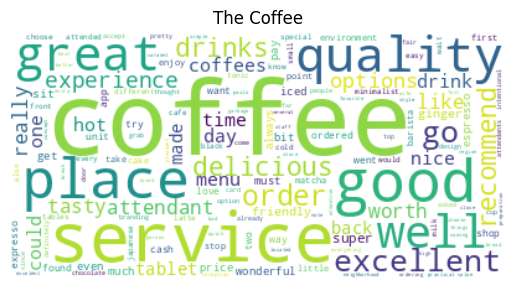

In [ ]:
# Definir o nome do restaurante que você deseja analisar
restaurante = input(str('Digite o restaurante desejado: '))

# Filtrar o DataFrame para selecionar apenas os dados do restaurante desejado
restaurante_freq_df = freq_df[freq_df["restaurante"] == restaurante]
restaurante_sent_df = sent_restaurante[sent_restaurante["restaurante"] == restaurante]

# Calcular a média da polaridade dos comentários do restaurante
polaridade_media = restaurante_sent_df["polaridade"].mean()

# Exibir legenda da polaridade
if polaridade_media > 0:
    legenda_polaridade = 'positiva'
elif polaridade_media < 0:
    legenda_polaridade = 'negativa'
else:
    legenda_polaridade = 'neutra'

print(f'A polaridade média dos comentários do restaurante {restaurante} é {polaridade_media:.2f} ({legenda_polaridade}).')

# Criar um dicionário com as palavras e suas frequências
palavras = dict(zip(restaurante_freq_df["palavra"], restaurante_freq_df["frequencia"]))
wordcloud = WordCloud(background_color='white').generate_from_frequencies(palavras)

# Mostrar a nuvem de palavras
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(restaurante)
plt.show()

# Verificando se nossa análise de polaridade corresponde com as notas dadas aos estabelecimentos

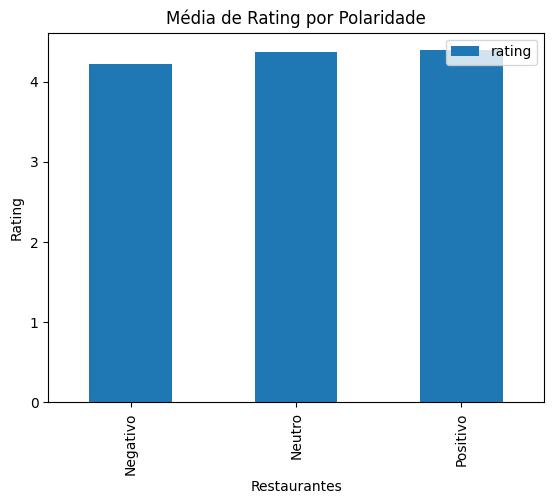

In [ ]:
import matplotlib.pyplot as plt

restaurant_sentiment = pd.read_csv('restaurant_polaridade.csv')
df = restaurant_sentiment.groupby('polaridade_texto').agg({'rating':'mean'})

# Plotar o gráfico de barras
df.plot(kind='bar')
plt.xlabel('Restaurantes')
plt.ylabel('Rating')
plt.title('Média de Rating por Polaridade')
plt.show()


Apesar da pouca variação entre as médias, a distribuição do gráfico mostra como a nossa análise de sentimentos está coerente com a realidade, visto que, comentarios classificados por nós como negativos de fato apresentam a menor média de nota de avaliação (rating), já os neutros são melhores que os negativos mas ainda ficam atrás dos positivos, como esperávamos que acontecesse.

# Salvando Dados de Polaridade Média dos restaurantes

In [ ]:
def summarize_text(text):
    # Transforma o texto em uma lista de frases
    sentences = text.split('. ')
    # Cria um objeto parser
    parser = PlaintextParser.from_string(text, Tokenizer("english"))
    # Gera o resumo selecionando as frases mais relevantes
    summarizer = LsaSummarizer()
    summarizer.stop_words = [' ']
    summary = summarizer(document=parser.document, sentences_count=2)

    # Retorna o resumo e as pontuações das frases
    return ' '.join(map(str, summary))

In [ ]:
restaurant_polaridade_media = sentimento_df.groupby(['restaurante'], as_index=False).agg({'polaridade': 'mean', 'rating': 'mean'})
sentimento_df.fillna('', inplace=True)
restaurant_polaridade_media_comentarios = sentimento_df.groupby(['restaurante'], as_index=False)['comentario'].apply('. '.join).reset_index()
restaurant_polaridade_media_comentarios['ResumoTexto'] = restaurant_polaridade_media_comentarios['comentario'].apply(summarize_text)

/usr/local/lib/python3.9/dist-packages/sumy/summarizers/lsa.py:76: UserWarning: Number of words (5) is lower than number of sentences (7). LSA algorithm may not work properly.
  warn(message % (words_count, sentences_count))
/usr/local/lib/python3.9/dist-packages/sumy/summarizers/lsa.py:76: UserWarning: Number of words (2) is lower than number of sentences (8). LSA algorithm may not work properly.
  warn(message % (words_count, sentences_count))
/usr/local/lib/python3.9/dist-packages/sumy/summarizers/lsa.py:76: UserWarning: Number of words (3) is lower than number of sentences (7). LSA algorithm may not work properly.
  warn(message % (words_count, sentences_count))
/usr/local/lib/python3.9/dist-packages/sumy/summarizers/lsa.py:76: UserWarning: Number of words (2) is lower than number of sentences (9). LSA algorithm may not work properly.
  warn(message % (words_count, sentences_count))
/usr/local/lib/python3.9/dist-packages/sumy/summarizers/lsa.py:76: UserWarning: Number of words (5) 

In [ ]:
restaurant_polaridade_media_comentarios = restaurant_polaridade_media_comentarios[['ResumoTexto', 'restaurante']]
restaurant_polaridade_media = restaurant_polaridade_media.merge(restaurant_polaridade_media_comentarios, how='left', on ='restaurante')
restaurant_polaridade_media[['polaridade_num', 'polaridade_texto']] = restaurant_polaridade_media['polaridade'].apply(polaridade).apply(pd.Series)

In [ ]:
df_rest = pd.read_csv('most_relevant_reviews.csv',sep = ',', usecols=['title', 'place_id']).drop_duplicates()

restaurant_polaridade_media = restaurant_polaridade_media.merge(df_rest, right_on='title', left_on='restaurante', how='left')
restaurant_polaridade_media = restaurant_polaridade_media[['place_id', 'title', 'rating', 'polaridade', 'polaridade_num', 'polaridade_texto', 'ResumoTexto']]
restaurant_polaridade_media.to_csv("restaurant_polaridade_media.csv", index=False)